<a href="https://colab.research.google.com/github/daniellecd/portfolio/blob/master/Queda_de_idosos/Previs%C3%A3o_custos_queda_idosos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão do custo relativo à queda de idosos**




## **Instalação dos pacotes necessários**

In [ ]:
#Instalação dos pacotes necessárias
!pip install pystan
!pip install fbprophet

In [ ]:
# Importação das bibliotecas necessárias 
import pandas as pd
import numpy as np

import fbprophet
from fbprophet import Prophet

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

## **Importação dos dados**

In [ ]:
#Leitura do dataset e cinco primeiras linhas
df = pd.read_excel('/content/Quedas_Idosos_Valor_Prophet.xlsx')
df.head()

,Data,Custo
0,2008-01-01,5780177
1,2008-02-01,5050445
2,2008-03-01,5795241
3,2008-04-01,5737648
4,2008-05-01,6445351


In [ ]:
df.tail()

,Data,Custo
139,2019-08-01,19888707
140,2019-09-01,17755952
141,2019-10-01,18363819
142,2019-11-01,17433788
143,2019-12-01,17867191


In [ ]:
# Verificação dos tipos de dados
df.dtypes

Data     datetime64[ns]
Custo             int64
dtype: object

In [ ]:
# Renomeando as colunas, conforme requisitado pela biblioteca Prophet, e visualização das cinco primeiras linhas
df.columns = ["ds","y"]
df.head()

,ds,y
0,2008-01-01,5780177
1,2008-02-01,5050445
2,2008-03-01,5795241
3,2008-04-01,5737648
4,2008-05-01,6445351


In [ ]:
df.head()

,ds,y
0,2008-01-01,5780177
1,2008-02-01,5050445
2,2008-03-01,5795241
3,2008-04-01,5737648
4,2008-05-01,6445351


## **Modelo Preditivo - Prophet**

In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet()

In [ ]:
# Ajuste do modelo
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model

In [ ]:
# Criando datas futuras para previsões em um dataframe
future = model.make_future_dataframe(periods = 24, freq='M')

In [ ]:
# Visualização das cinco últimas linhas - última da da previsão é Dezembro de 2021
future.tail()

,ds
163,2021-07-31
164,2021-08-31
165,2021-09-30
166,2021-10-31
167,2021-11-30


In [ ]:
# Previsão dos dados 
pred = model.predict(future)

In [ ]:
# Visualização dos dados gerados pelo modelo
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,5.736665e+06,4.581748e+06,5.643361e+06,5.736665e+06,5.736665e+06,-6.074087e+05,-6.074087e+05,-6.074087e+05,-6.074087e+05,-6.074087e+05,-6.074087e+05,0.0,0.0,0.0,5.129256e+06
1,2008-02-01,5.827864e+06,4.193452e+06,5.201987e+06,5.827864e+06,5.827864e+06,-1.093975e+06,-1.093975e+06,-1.093975e+06,-1.093975e+06,-1.093975e+06,-1.093975e+06,0.0,0.0,0.0,4.733888e+06
2,2008-03-01,5.913179e+06,4.951390e+06,6.021288e+06,5.913179e+06,5.913179e+06,-4.073059e+05,-4.073059e+05,-4.073059e+05,-4.073059e+05,-4.073059e+05,-4.073059e+05,0.0,0.0,0.0,5.505873e+06
3,2008-04-01,6.004378e+06,4.916202e+06,5.958420e+06,6.004378e+06,6.004378e+06,-5.745172e+05,-5.745172e+05,-5.745172e+05,-5.745172e+05,-5.745172e+05,-5.745172e+05,0.0,0.0,0.0,5.429860e+06
4,2008-05-01,6.092634e+06,6.343174e+06,7.415995e+06,6.092634e+06,6.092634e+06,7.826330e+05,7.826330e+05,7.826330e+05,7.826330e+05,7.826330e+05,7.826330e+05,0.0,0.0,0.0,6.875267e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2021-07-31,2.092745e+07,2.215083e+07,2.315998e+07,2.082498e+07,2.102215e+07,1.737585e+06,1.737585e+06,1.737585e+06,1.737585e+06,1.737585e+06,1.737585e+06,0.0,0.0,0.0,2.266503e+07
164,2021-08-31,2.104994e+07,2.024876e+07,2.126446e+07,2.093842e+07,2.115147e+07,-2.816115e+05,-2.816115e+05,-2.816115e+05,-2.816115e+05,-2.816115e+05,-2.816115e+05,0.0,0.0,0.0,2.076833e+07
165,2021-09-30,2.116849e+07,2.041529e+07,2.148007e+07,2.104612e+07,2.127504e+07,-2.021867e+05,-2.021867e+05,-2.021867e+05,-2.021867e+05,-2.021867e+05,-2.021867e+05,0.0,0.0,0.0,2.096630e+07
166,2021-10-31,2.129098e+07,2.015852e+07,2.119240e+07,2.115822e+07,2.140397e+07,-6.288592e+05,-6.288592e+05,-6.288592e+05,-6.288592e+05,-6.288592e+05,-6.288592e+05,0.0,0.0,0.0,2.066212e+07


In [ ]:
# Visulaização das cinco primeiras linhas dos dados ds (data), yhat (previsão do modelo), yhat_lower e yhta_uooer (valores previstos para os intervalos de incerteza)
pred[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2008-01-01,5.129256e+06,4.581748e+06,5.643361e+06
1,2008-02-01,4.733888e+06,4.193452e+06,5.201987e+06
2,2008-03-01,5.505873e+06,4.951390e+06,6.021288e+06
3,2008-04-01,5.429860e+06,4.916202e+06,5.958420e+06
4,2008-05-01,6.875267e+06,6.343174e+06,7.415995e+06


In [ ]:
# Visulaização das cinco últimas linhas dos dados ds (data), yhat (previsão do modelo), yhat_lower e yhta_uooer (valores previstos para os intervalos de incerteza)
pred[["ds","yhat","yhat_lower","yhat_upper"]].tail(11)

,ds,yhat,yhat_lower,yhat_upper
157,2021-01-31,1.927607e+07,1.873274e+07,1.978788e+07
158,2021-02-28,1.949407e+07,1.896660e+07,2.001006e+07
159,2021-03-31,2.058748e+07,2.006316e+07,2.107247e+07
160,2021-04-30,2.065987e+07,2.012602e+07,2.115974e+07
161,2021-05-31,2.048230e+07,1.995728e+07,2.097055e+07
162,2021-06-30,2.257963e+07,2.203889e+07,2.309601e+07
163,2021-07-31,2.266503e+07,2.215083e+07,2.315998e+07
164,2021-08-31,2.076833e+07,2.024876e+07,2.126446e+07
165,2021-09-30,2.096630e+07,2.041529e+07,2.148007e+07
166,2021-10-31,2.066212e+07,2.015852e+07,2.119240e+07


## **Análise gráfica do modelo de previsão**

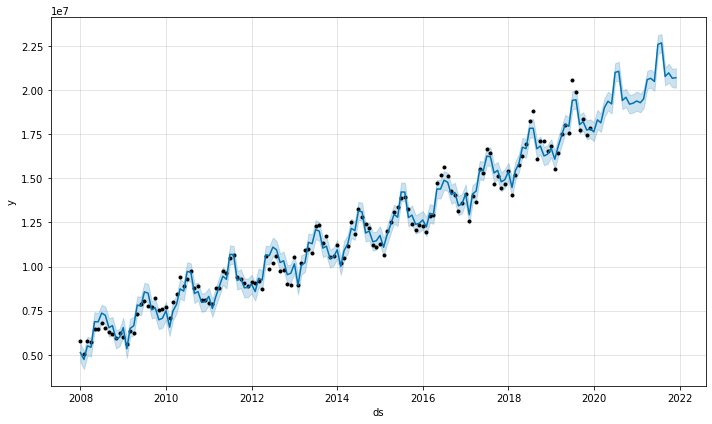

In [ ]:
#Visualização gráfica dos dados - Período de 2008 a 2021
ax = model.plot(pred);

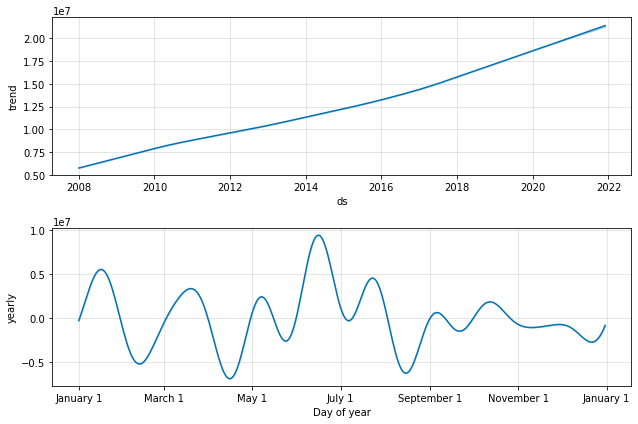

In [ ]:
#visualizacao de cada componente do modelo previsto. Trend é a tendências e yearly a sazonalidade
model.plot_components(pred);

Conforme observado nos gráficos acima, há uma tendência de crescimento dos custos relativos à quedas que poderão ocorrer com os idosos, podendo representar custos de quase 230 milhões de reais no ano de 2021, com média de 20,8 milhões por mês.